In dieser Aufgabe soll die Binarisierung von Bildern anhand von drei Beispielbildern nachvollzogen werden.

Die drei Beispielbilder `cell()`, `brick()` und `coins()` stammen aus `skimage.data`.

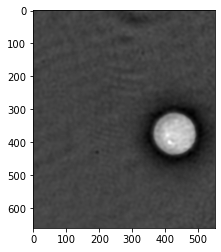

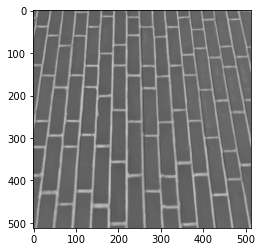

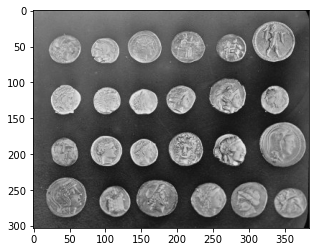

In [2]:
import math
from skimage.data import brick, cell, coins
import matplotlib.pyplot as plt
from skimage.segmentation import mark_boundaries
from skimage.filters import threshold_otsu
from skimage.color import label2rgb, rgb2hsv, rgb2gray
import numpy as np
from skimage.io import imread

imgCell = cell()
imgBrick = brick()
imgCoins = coins()

plt.figure(1)
plt.imshow(imgCell, cmap='gray', vmin=0, vmax=255)

plt.figure(2)
plt.imshow(imgBrick, cmap='gray', vmin=0, vmax=255)

plt.figure(3)
plt.imshow(imgCoins, cmap='gray', vmin=0, vmax=255)

Zunächst soll das `cell`-Bild binarisiert werden (Zelle vs. Hintergrund). Wie lässt sich ein geeigneter Schwellenwert händisch bzw. automatisch ermitteln?

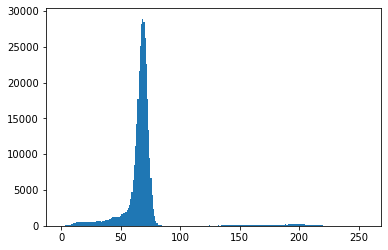

Histogramm händisch: 110
Otsu automatisch: 122


In [23]:
"""thres = imgCell[400,400]
print(thres)
label = imgCell>thres-60
plt.imshow(label,cmap="gray",vmin=0,vmax=1)
plt.show()
vis = mark_boundaries(imgCell, label, mode="thick")
plt.imshow(vis,cmap="gray",vmin=0,vmax=255)
plt.show()"""

plt.hist(imgCell.flatten(), bins=256, range=(0,256)) 
plt.show() 
print("Histogramm händisch:",110)
print("Otsu automatisch:",threshold_otsu(imgCell)) #=>122

Wendet den so ermittelten Schwellenwert an und erzeugt ein gelabeltes Bild (Maske), das für jedes Pixel die Zugehörigkeit zu Vordergrund oder Hintergrund beinhaltet. Visualisiert das gelabelte Bild mit den präsentierten Methoden. Ist das Ergebnis gut? Warum?

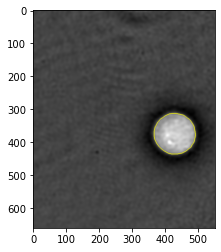

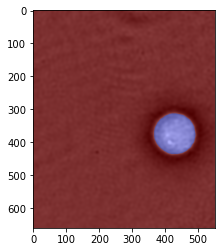

In [46]:
label = imgCell>110

vis = mark_boundaries(imgCell, label, mode="thick")
plt.imshow(vis,cmap="gray",vmin=0,vmax=255)
plt.show()

vis = label2rgb(label,imgCell,bg_label=-1)
plt.imshow(vis,cmap="gray",vmin=0,vmax=255)
plt.show()

Führt nun die gleiche Pipeline für das `brick`-Bild durch. Dabei sollen Ziegel und Fugen unterschieden werden. Wird das Ergebnis ähnlich gut sein?

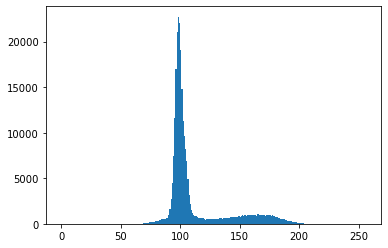

Histogramm händisch: 123
Otsu automatisch: 131


In [28]:
plt.hist(imgBrick.flatten(), bins=256, range=(0,256)) 
plt.show() 
print("Histogramm händisch:",123)
print("Otsu automatisch:",threshold_otsu(imgBrick)) #=>122

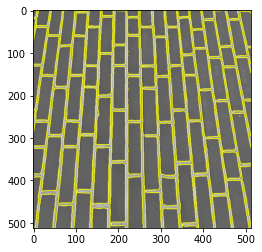

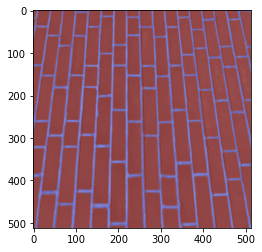

In [45]:
label = imgBrick>threshold_otsu(imgBrick)

vis = mark_boundaries(imgBrick, label, mode="thick")
plt.imshow(vis,cmap="gray",vmin=0,vmax=255)
plt.show()

vis = label2rgb(label,imgBrick ,bg_label=-1)
plt.imshow(vis,cmap="gray",vmin=0,vmax=255)
plt.show()

Wie könnte man jeden Ziegel einzeln markieren und nicht alle zusammen? Welche Voraussetzung wäre dazu nötig? Wäre das dann noch eine Binarisierung?

Es muss hier nichts implementiert werden!

In [ ]:
#ConvectedComponentlabeling, wie Aufgabe: Eier zählen 

Betrachtet nun das `coins`-Bild. Wird sich dieses Bild ebenso gut mit der bekannten Pipeline binarisieren lassen? Probiert es aus!

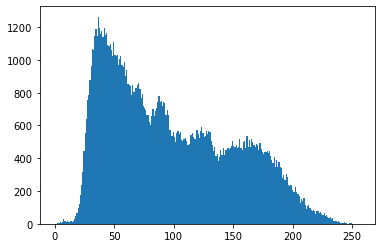

Histogramm händisch: 140
Otsu automatisch: 107


In [39]:
plt.hist(imgCoins.flatten(), bins=256, range=(0,256)) 
plt.show() 
print("Histogramm händisch:",140)
print("Otsu automatisch:",threshold_otsu(imgCoins)) #=>122

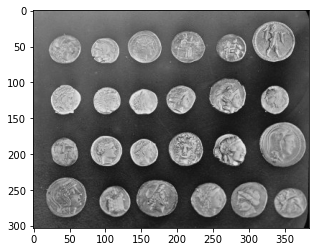

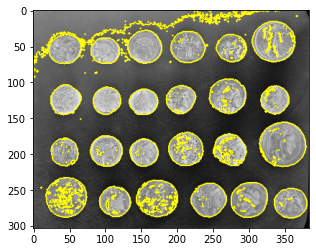

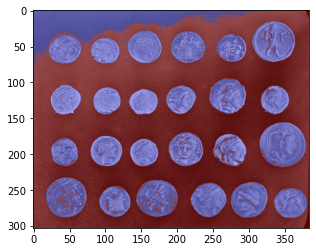

In [44]:
plt.imshow(imgCoins,cmap="gray",vmin=0,vmax=255)
plt.show()

label = imgCoins>threshold_otsu(imgCoins)

vis = mark_boundaries(imgCoins, label, mode="thick")
plt.imshow(vis,cmap="gray",vmin=0,vmax=255)
plt.show()

vis = label2rgb(label,imgCoins ,bg_label=-1)
plt.imshow(vis,cmap="gray",vmin=0,vmax=255)
plt.show()


Welches Problem ergibt sich nun? Wie könnte sich das Problem mit einfachen Mitteln lösen lassen? Implementiert eure Idee!

Tipp: Kacheln

In [ ]:
#Einzelne Kacheln wie bei der Aufgabe: Mond-Kacheln